In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc
import seaborn as sns
from pywaffle import Waffle
import folium
import calmap

In [3]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'

In [14]:
import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

# Data info

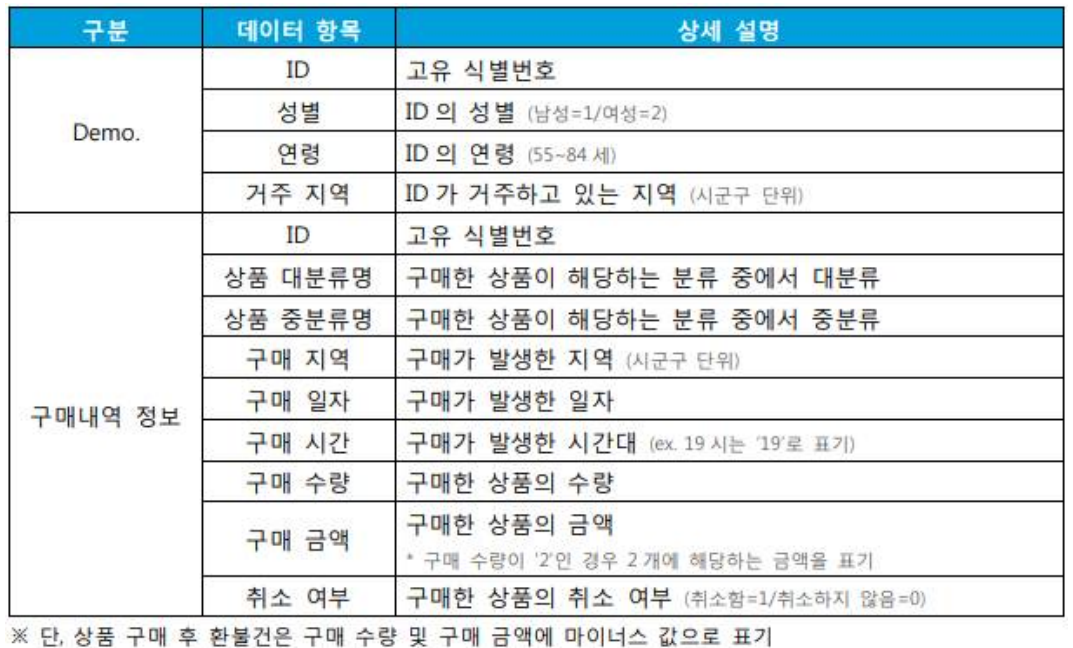

1. DEMO

```ID = ID 의 성 별 （낭성＝1／여성＝2)```

```연 령 = ID 의 연 령 / Age of ID```

```거 주 지역 =  ID 가 거 주하고 있는 지역 / The area where the residential area ID resides.```

 ----------
 
 2. Sales info
 
 ```ID  = 고유 식 별번호 / ID unique identification number```
 
 ```상품 대분류 = 구매한 상품이 해당하는 분류 중에서 대분류/Product classification = Large classification among the categories of purchased products```
 
 ```상품 중분류 = 구애한 상품이 해당하는 분류 중에서 중분류 / Product category = Division among categories corresponding to courting products```
 
```구 매 지역 = 구매가 발생한 지 역 / Purchasing area = the area where the purchase occurred```

```구 매 일자 = 구매가 발생한 일자 / Date of purchase = Date of purchase```

 ``` 구매 시간 =  시간 구매가 발생한 시 간 / The time at which the time purchase occurred```
 
 ``` 구매 수량  =  구매 상품 의 수량 / Purchase Quantity = Quantity of purchased products```
 
 ```취소 여부 = 구매한 상품의 취소 여/ Cancellation status = Cancellation of purchased goods```

# EDA

## Demo

In [6]:
mpl.style.use(['seaborn-notebook', 'seaborn-darkgrid'])

In [7]:
demo = r'C:\Users\MSI\Desktop\Kookmin\Second semester\Programming analysis\team project\demo1.csv'
demo = pd.read_csv(demo) 
demo

,ID,성별,연령,거주지역
0,478207946,1,84,서울 성동구
1,479806984,1,84,서울 서초구
2,94790213,1,84,부산 사상구
3,656026338,1,84,서울 영등포구
4,433076833,1,83,경기 고양시
...,...,...,...,...
3537,154314532,1,66,부산 사하구
3538,416998709,1,59,경기 수원시
3539,168692065,2,63,경기 안양시
3540,955481370,2,58,경기 의왕시


In [8]:
demo.성별 = demo.성별.map({1: '남', 2: '여'})

In [9]:
demo.isnull().sum()

ID      0
성별      0
연령      0
거주지역    0
dtype: int64

In [10]:
demo.describe(include='all')

,ID,성별,연령,거주지역
count,3.542000e+03,3542,3542.000000,3542
unique,NaN,2,NaN,72
top,NaN,여,NaN,서울 송파구
freq,NaN,2683,NaN,243
mean,5.064984e+08,NaN,61.075381,NaN
std,2.948376e+08,NaN,5.938803,NaN
min,7.414630e+05,NaN,55.000000,NaN
25%,2.522879e+08,NaN,56.000000,NaN
50%,5.062270e+08,NaN,59.000000,NaN
75%,7.732174e+08,NaN,64.000000,NaN


In [11]:
demo['거주지역'].nunique()

72

In [12]:
demo 

,ID,성별,연령,거주지역
0,478207946,남,84,서울 성동구
1,479806984,남,84,서울 서초구
2,94790213,남,84,부산 사상구
3,656026338,남,84,서울 영등포구
4,433076833,남,83,경기 고양시
...,...,...,...,...
3537,154314532,남,66,부산 사하구
3538,416998709,남,59,경기 수원시
3539,168692065,여,63,경기 안양시
3540,955481370,여,58,경기 의왕시


C:\Users\MSI\anaconda3\envs\tf-latest\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-15-754d0253350d>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  by_genre.set_yticklabels(by_genre.get_yticks(), size = 15)


Text(0.5, 0, '성별')

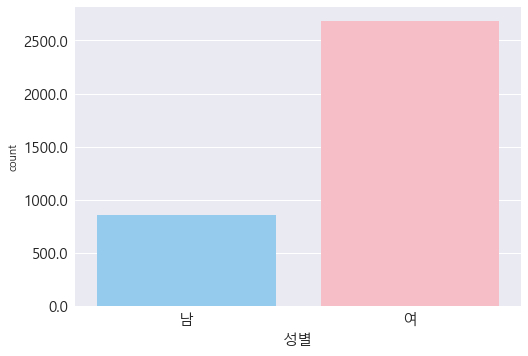

In [15]:
by_genre= sns.countplot(demo['성별'], palette= ['#87CEFA', '#FFB6C1',])
by_genre.set_xticklabels(['남','여'], fontsize= 15)
by_genre.set_yticklabels(by_genre.get_yticks(), size = 15)
by_genre.set_xlabel('성별', fontsize= 15)

```Most of the consumers are women```

<ipython-input-16-ce53eefbd5a2>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), size = 15)
<ipython-input-16-ce53eefbd5a2>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), size = 15)
C:\Users\MSI\anaconda3\envs\tf-latest\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-16-ce53eefbd5a2>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticks(), size = 15)


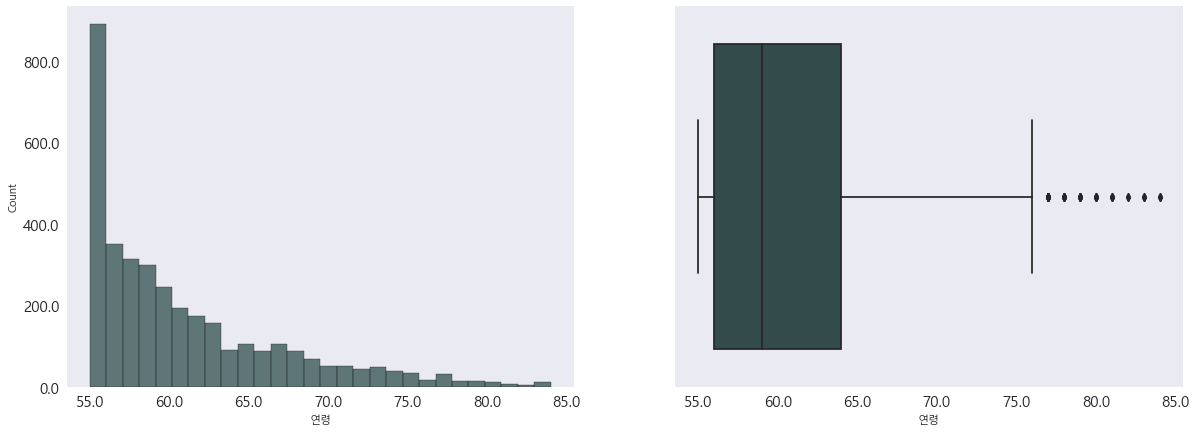

In [16]:
fig, ax = plt.subplots(ncols= 2 , figsize = (20, 7))

ax1 = sns.histplot(demo['연령'], color= 'darkslategray', ax= ax[0])
ax1.set_xticklabels(ax1.get_xticks(), size = 15)
ax1.set_yticklabels(ax1.get_yticks(), size = 15)
ax1.grid(False) 

ax2 = sns.boxplot(demo['연령'], color='darkslategray', ax = ax[1])
ax2.set_xticklabels(ax2.get_xticks(), size = 15)
ax2.grid(False) 

```most of the consumers are 55 year old. the mean of their ages is 59 and there are outlier values after the 75 years```

### Analysis by men

In [17]:
man = demo[demo['성별'] == '남']

<ipython-input-18-92bbc3b1232a>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), size = 15)
<ipython-input-18-92bbc3b1232a>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), size = 15)
C:\Users\MSI\anaconda3\envs\tf-latest\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-18-92bbc3b1232a>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticks(), size = 15)


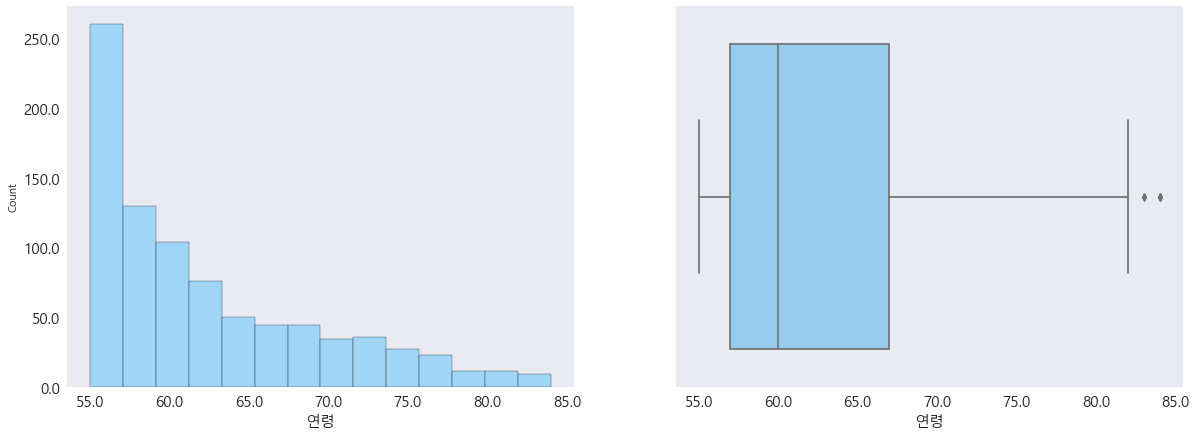

In [18]:
fig, ax = plt.subplots(ncols=2, figsize = (20, 7))

ax1 = sns.histplot(man['연령'], color=['#87CEFA'], ax= ax[0])
ax1.set_xlabel('연령', fontsize=15) #
ax1.set_xticklabels(ax1.get_xticks(), size = 15)
ax1.set_yticklabels(ax1.get_yticks(), size = 15)
ax1.grid(False) 

ax2 = sns.boxplot(man['연령'],palette=['#87CEFA'], ax = ax[1])
ax2.set_xlabel('연령', fontsize=15) 
ax2.set_xticklabels(ax2.get_xticks(), size = 15)
ax2.grid(False) 

In [19]:
#---------CREATE MAP FROM THIS--------
man_location = man.groupby('거주지역')['거주지역'].count().sort_values(ascending = False)
top_15_loc_m = man_location.head(15)

In [20]:
top_15_loc_m = pd.DataFrame(top_15_loc_m) 
top_15_loc_m.rename(columns= {'거주지역':'count'}, inplace=True)
top_15_loc_m.reset_index(inplace=True)

In [21]:
lat = [37.568290, 37.568290, 37.6584, 35.1631, 37.5172, 37.4449, 35.1044, 37.6542, 37.5744, 37.2636,
      37.3219, 37.6360, 37.5264,37.5034,37.4912 ]
long = [126.997780, 126.997780, 126.8320, 129.1636, 127.0473, 127.1389, 128.9747, 127.0568, 127.0400, 127.0286,
       126.8309,127.2165, 126.8962,126.7660,127.4876  ]

In [22]:
top_15_loc_m['y'] = lat
top_15_loc_m['x'] = long

In [23]:
activity = folium.map.FeatureGroup()

for lat, long in zip(top_15_loc_m.y, top_15_loc_m.x):
    activity.add_child(
                        folium.features.CircleMarker([lat, long],
                        radius = 8,
                        color = 'blue',
                        fill = True,
                        fill_color = 'blue',
                        fill_opacity = 0.4))

In [24]:
latitude = 35.9078
longitude = 127.7669
sk_m = folium.Map(location=[latitude, longitude], zoom_start=8)

In [25]:
sk_m.add_child(activity)

### Analysis by women

In [26]:
women = demo[demo['성별']=='여']

<ipython-input-27-6a792e7e4d88>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), size = 15)
<ipython-input-27-6a792e7e4d88>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), size = 15)
C:\Users\MSI\anaconda3\envs\tf-latest\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-27-6a792e7e4d88>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticks(), size = 15)


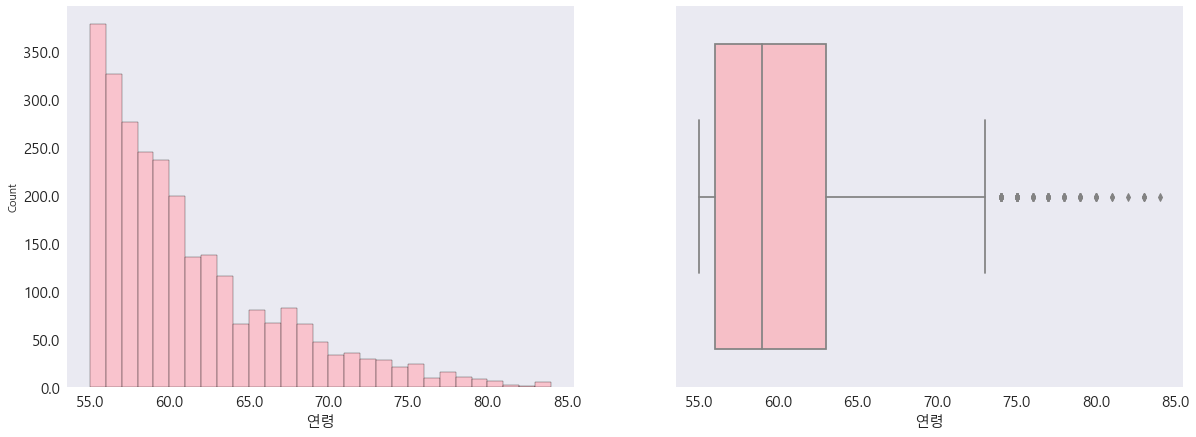

In [27]:
fig, ax = plt.subplots(ncols=2, figsize = (20, 7))

ax1 = sns.histplot(women['연령'], color=['#FFB6C1'], ax= ax[0])
ax1.set_xlabel('연령', fontsize=15) #
ax1.set_xticklabels(ax1.get_xticks(), size = 15)
ax1.set_yticklabels(ax1.get_yticks(), size = 15)
ax1.grid(False) 

ax2 = sns.boxplot(women['연령'],palette=['#FFB6C1'], ax = ax[1])
ax2.set_xlabel('연령', fontsize=15) 
ax2.set_xticklabels(ax2.get_xticks(), size = 15)
ax2.grid(False) 

In [28]:
woman_location = demo.groupby('거주지역')['거주지역'].count().sort_values(ascending=False)
top_15_loc_w = woman_location.head(15)
top_15_loc_w

거주지역
서울 송파구     243
경기 안양시     207
경기 고양시     195
부산 해운대구    184
서울 강남구     129
경기 안산시     124
경기 성남시     121
서울 동대문구    100
부산 사하구      95
경기 수원시      94
서울 노원구      85
부산 수영구      80
서울 영등포구     70
서울 강서구      66
경기 부천시      65
Name: 거주지역, dtype: int64

### Map

In [29]:
top_15_loc_w = pd.DataFrame(top_15_loc_w)
top_15_loc_w.rename(columns= {'거주지역':'count'}, inplace=True)

In [30]:
top_15_loc_w.reset_index(inplace=True)

In [31]:
top_15_loc_w

,거주지역,count
0,서울 송파구,243
1,경기 안양시,207
2,경기 고양시,195
3,부산 해운대구,184
4,서울 강남구,129
5,경기 안산시,124
6,경기 성남시,121
7,서울 동대문구,100
8,부산 사하구,95
9,경기 수원시,94


In [32]:
lat = [37.568290, 37.568290, 37.6584, 35.1631,37.5172, 37.3219, 37.4449,37.5744, 35.1044, 37.2636,
      37.6542, 35.1456, 37.5264, 37.5510, 37.5034 ]
long = [126.997780, 126.997780, 126.8320, 129.1636, 127.0473, 126.8309, 127.1389, 127.0400, 128.9747, 127.0286,
       127.0568, 129.1131,126.8962, 126.8495,126.7660 ]

In [33]:
top_15_loc_w['y'] = lat
top_15_loc_w['x'] = long

In [34]:
activity = folium.map.FeatureGroup()

for lat, long in zip(top_15_loc_w.y, top_15_loc_w.x):
    activity.add_child(
                        folium.features.CircleMarker([lat, long],
                        radius = 5,
                        color = 'red',
                        fill = True,
                        fill_color = 'red',
                        fill_opacity = 0.5))

In [35]:
#mapa korea
latitude = 35.9078
longitude = 127.7669
sk = folium.Map(location=[latitude, longitude], zoom_start=8)

In [36]:
sk.add_child(activity)

## By men and women

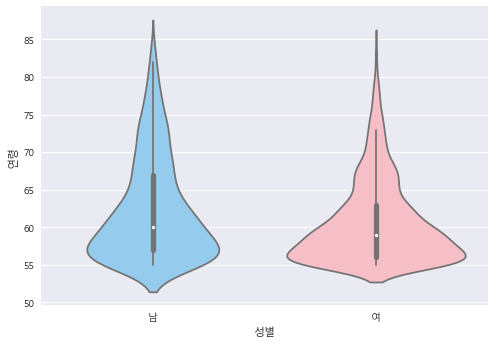

In [37]:
sns.violinplot(data=demo, x='성별', y='연령', split=False, palette=['#87CEFA', '#FFB6C1'])
plt.show()

In [38]:
all_locations = pd.concat([top_15_loc_m, top_15_loc_w], axis=0)

In [39]:
activity = folium.map.FeatureGroup()
for lat, long in zip(all_locations.y, all_locations.x):
    activity.add_child(
                        folium.features.CircleMarker([lat, long],
                        radius = 5,
                        color = 'green',
                        fill = True,
                        fill_color = 'green',
                        fill_opacity = 0.8))

In [40]:
all_locations.nunique()

거주지역     17
count    25
y        16
x        16
dtype: int64

In [41]:
latitude = 35.9078
longitude = 127.7669
sk_all = folium.Map(location=[latitude, longitude], zoom_start=8)

In [42]:
sk_all.add_child(activity)

## DATA (구매내역정보)

In [43]:
data = 'C:/Users/MSI/Desktop/Kookmin/Second semester/Programming analysis/team project/data.csv'
data = pd.read_csv(data, parse_dates=[4]) 
data

,ID,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,구매금액,취소여부
0,410362886,의류잡화,여성용의류-정장류,서울 송파구,2014-05-10,1,1,198000,0
1,643279402,식품,농산물,경기 성남시,2014-06-12,1,1,2000,0
2,643279402,식품,농산물,경기 성남시,2014-06-12,1,1,4000,0
3,643279402,식품,농산물,경기 성남시,2014-06-12,1,1,5000,0
4,643279402,식품,농산물,경기 성남시,2014-06-12,1,1,9000,0
...,...,...,...,...,...,...,...,...,...
101687,797822538,가전제품,휴대폰/태블릿,서울 중구,2014-05-28,22,1,0,0
101688,797822538,가전제품,휴대폰/태블릿,서울 중구,2014-05-28,22,1,9000,0
101689,862978930,레포츠,스포츠용품/의류,서울 강서구,2014-08-17,22,1,88000,0
101690,968743249,가전제품,TV/AV,경기 성남시,2014-10-31,22,1,2569000,0


In [44]:
data.columns

Index(['ID', '상품대분류명', '상품중분류명', '구매지역', '구매일자', '구매시간', '구매수량', '구매금액',
       '취소여부'],
      dtype='object')

In [45]:
data.isnull().sum()

ID        0
상품대분류명    0
상품중분류명    0
구매지역      0
구매일자      0
구매시간      0
구매수량      0
구매금액      0
취소여부      0
dtype: int64

In [46]:
data.describe(include='all')

<ipython-input-46-589a52936347>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')


,ID,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,구매금액,취소여부
count,1.016920e+05,101692,101692,101692,101692,101692.000000,101692.000000,1.016920e+05,101692.000000
unique,NaN,7,31,65,364,NaN,NaN,NaN,NaN
top,NaN,식품,가공식품,서울 송파구,2014-04-04 00:00:00,NaN,NaN,NaN,NaN
freq,NaN,38597,19385,11275,553,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,2014-01-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2014-12-31 00:00:00,NaN,NaN,NaN,NaN
mean,5.027795e+08,NaN,NaN,NaN,NaN,15.313427,1.190280,7.680522e+04,0.082199
std,2.925773e+08,NaN,NaN,NaN,NaN,2.476137,9.480435,3.415087e+05,0.274669
min,7.414630e+05,NaN,NaN,NaN,NaN,1.000000,-791.000000,-9.555000e+06,0.000000
25%,2.507561e+08,NaN,NaN,NaN,NaN,13.000000,1.000000,6.000000e+03,0.000000


### 구매수량

In [47]:
products = data.groupby('상품대분류명')['구매수량'].agg('count')
products = pd.DataFrame(products)
products.sort_values(by = '구매수량', ascending=False, inplace=True)

In [48]:
products

,구매수량
상품대분류명,
식품,38597
의류잡화,32028
가전제품,11006
생활잡화,10086
레포츠,8015
명품,1226
가구,734


In [49]:
#by_bins = data.groupby(pd.cut(data['구매수량'], np.arange(0, 837, 83.6))).count()

In [50]:
#by_bins = pd.DataFrame(by_bins['상품대분류명']) #count by groups of quantity

In [51]:
#WAFFLE OF 상품대분류명
total = sum(products['구매수량'])
proportion = [float(value/total) for value in products['구매수량']]

In [52]:
width = 40
height = 10
total_num_tiles = width*height

In [53]:
products['proportions'] = [round(total_num_tiles*proportions) for proportions in proportion]

In [132]:
color_l = ['#FF8C00', '#2F4F4F', '#006400', '#F08080', '#778899', '#A0522D', '#DEB887']

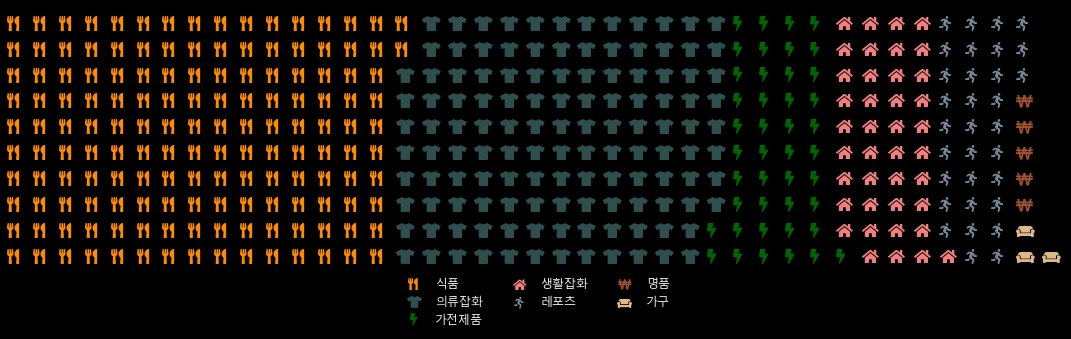

In [133]:
fig = plt.figure(
                FigureClass= Waffle,
                rows = 10,
                values = products['proportions'],
                colors = color_l,
                labels = list(products.index),
                figsize = (15, 10),
                block_arranging_style = 'snake',
                tight = True,
                icons = ['utensils', 'tshirt', 'bolt', 'home', 'running', 'won-sign', 'couch'],
                icon_size=15,
                icon_legend=True,
                legend = {'loc': 'lower center', 'bbox_to_anchor': (0.5, -0.3), 'ncol':3, 'framealpha': 0, 'fontsize': 12,
                         'labelcolor':'white'})
fig.set_facecolor('#000000')

### 구매시간

In [56]:
time = data.groupby('상품중분류명')['구매시간'].agg('mean')
time = pd.DataFrame(time)
time.head()

,구매시간
상품중분류명,
PC/노트북/프린터/카메라,15.297125
TV/AV,15.408500
가공식품,15.368790
가구,14.782016
건강식품,14.874080


In [57]:
data.columns

Index(['ID', '상품대분류명', '상품중분류명', '구매지역', '구매일자', '구매시간', '구매수량', '구매금액',
       '취소여부'],
      dtype='object')

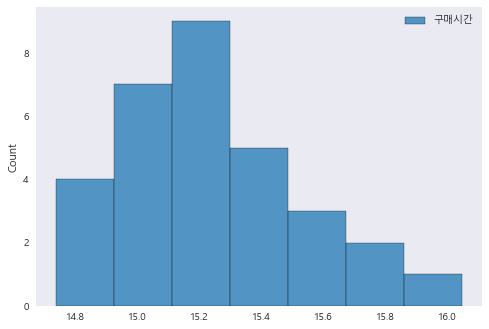

In [58]:
#this are the median hour were the products are bought
a = sns.histplot(time, color='darkslategray')
a.grid(False)

<AxesSubplot:xlabel='구매시간', ylabel='Count'>

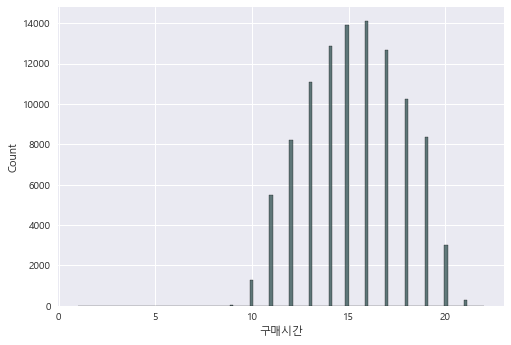

In [59]:
sns.histplot(x = data['구매시간'], color='darkslategray') #general time for everything

### 취소여부

In [60]:
a = data.groupby('취소여부')['구매수량'].sum()
a = abs(a)
a = pd.DataFrame(a)
a.reset_index(inplace=True)

<ipython-input-61-d5264bcf15f2>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  cancel.set_yticklabels(cancel.get_yticks(), fontsize = 15)


[Text(0, 0.0, '0.0'),
 Text(0, 20000.0, '20000.0'),
 Text(0, 40000.0, '40000.0'),
 Text(0, 60000.0, '60000.0'),
 Text(0, 80000.0, '80000.0'),
 Text(0, 100000.0, '100000.0'),
 Text(0, 120000.0, '120000.0'),
 Text(0, 140000.0, '140000.0'),
 Text(0, 160000.0, '160000.0')]

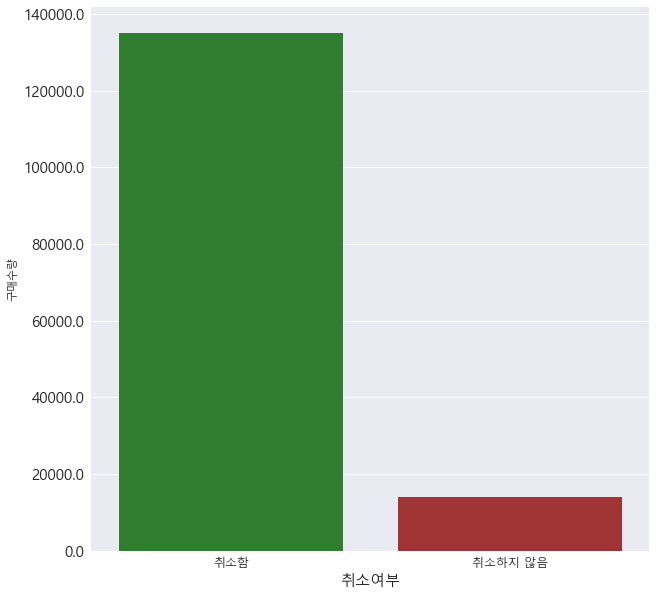

In [61]:
plt.figure(figsize=(10,10))
cancel = sns.barplot(x= a['취소여부'], y= a['구매수량'], palette=['forestgreen', 'firebrick'])
cancel.set_xlabel('취소여부', fontsize=15) 
cancel.set_xticklabels(['취소함','취소하지 않음'], fontsize = 12)
cancel.set_yticklabels(cancel.get_yticks(), fontsize = 15) 

In [62]:
yes_no = data.groupby('상품대분류명')['취소여부'].agg('sum')
yes_no = pd.DataFrame(yes_no)
yes_no.reset_index(inplace=True)

In [63]:
yes_no

,상품대분류명,취소여부
0,가구,57
1,가전제품,456
2,레포츠,1213
3,명품,203
4,생활잡화,829
5,식품,693
6,의류잡화,4908


<ipython-input-64-d14e0eb4d4bf>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_yticklabels(b.get_yticks(), size = 15)


[Text(0, 0.0, '0.0'),
 Text(0, 1000.0, '1000.0'),
 Text(0, 2000.0, '2000.0'),
 Text(0, 3000.0, '3000.0'),
 Text(0, 4000.0, '4000.0'),
 Text(0, 5000.0, '5000.0'),
 Text(0, 6000.0, '6000.0')]

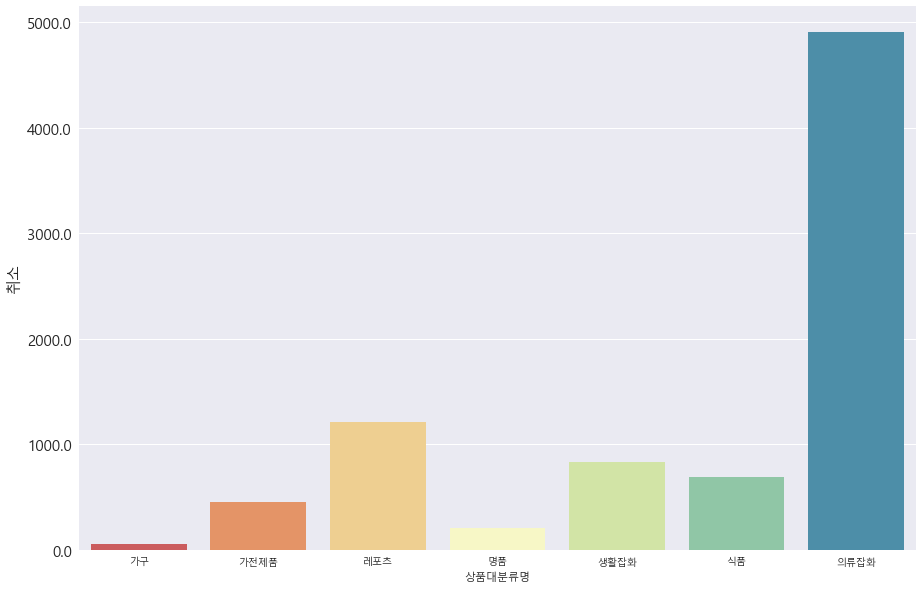

In [64]:
plt.subplots(figsize = (15, 10))
b = sns.barplot(x = yes_no['상품대분류명'], y= yes_no['취소여부'], palette='Spectral')
b.set_ylabel('취소', fontsize = 15)
b.set_yticklabels(b.get_yticks(), size = 15)

### 구매일자

<AxesSubplot:xlabel='구매일자', ylabel='구매수량'>

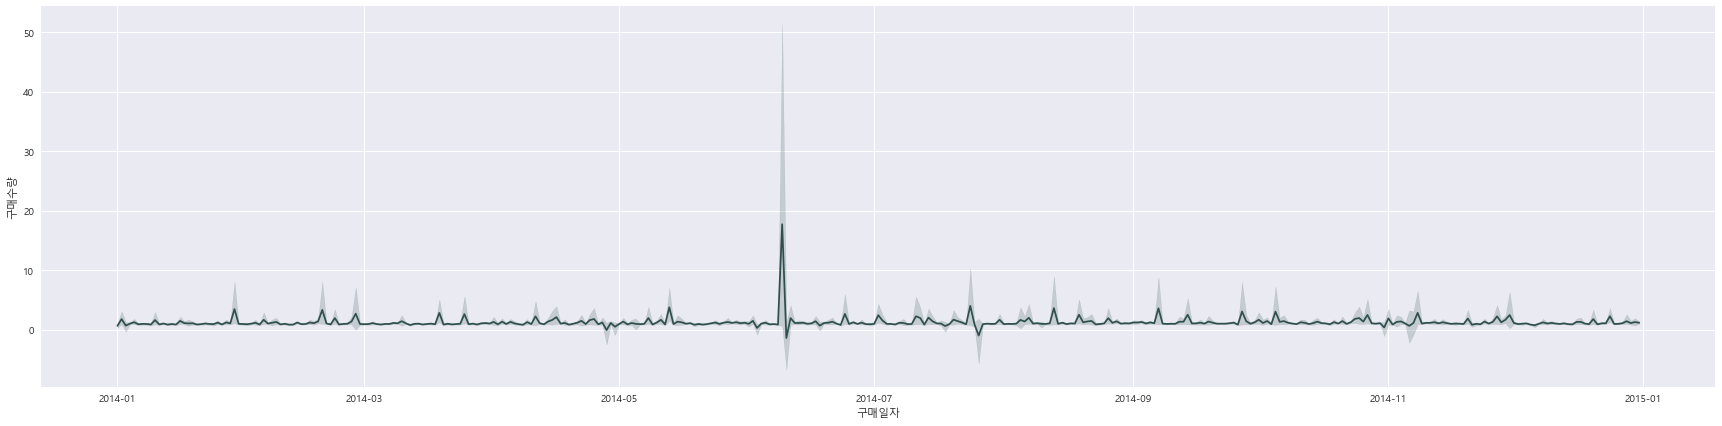

In [65]:
plt.subplots(figsize = (30, 7))
sns.lineplot(x = data['구매일자'], y= data['구매수량'], color='darkslategray')

In [66]:
data.columns

Index(['ID', '상품대분류명', '상품중분류명', '구매지역', '구매일자', '구매시간', '구매수량', '구매금액',
       '취소여부'],
      dtype='object')

In [67]:
#Focus on the big part of the graph
date1 = data['구매일자'] > '2014-06'
date2 = data['구매일자'] < '2014-07'
between_y = data[date1 & date2]

<AxesSubplot:xlabel='구매일자', ylabel='구매수량'>

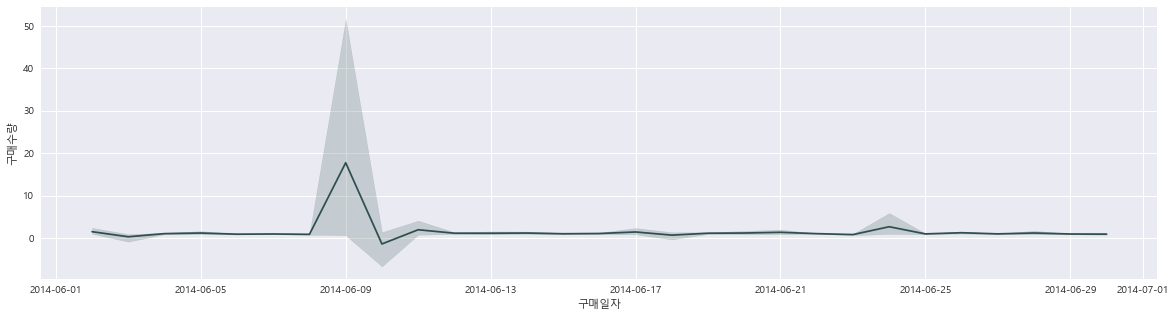

In [68]:
plt.subplots(figsize = (20, 5))
sns.lineplot(x = between_y['구매일자'], y= between_y['구매수량'], color='darkslategray')

In [69]:
import datetime as dt
month = data['구매일자'].dt.month == 6
day = data['구매일자'].dt.day == 10
special_date = data[ month & day]

In [70]:
special_date.head(20)

,ID,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,구매금액,취소여부
532,369117330,식품,가공식품,부산 중구,2014-06-10,10,1,4000,0
533,369117330,식품,음료,부산 중구,2014-06-10,10,10,19000,0
873,643883115,의류잡화,여성용의류-SPA,경기 안양시,2014-06-10,10,1,18000,0
874,643883115,의류잡화,여성용의류-SPA,경기 안양시,2014-06-10,10,1,44000,0
2212,141413457,레포츠,스포츠용품/의류,부산 중구,2014-06-10,11,1,78000,0
2865,270414824,식품,농산물,서울 중구,2014-06-10,11,1,9000,0
4109,530157522,레포츠,스포츠용품/의류,서울 강서구,2014-06-10,11,1,30000,0
4110,530157522,레포츠,스포츠용품/의류,서울 강서구,2014-06-10,11,1,31000,0
4111,530157522,레포츠,스포츠용품/의류,서울 강서구,2014-06-10,11,1,42000,0
4112,530157522,레포츠,스포츠용품/의류,서울 강서구,2014-06-10,11,1,44000,0


In [71]:
special_date.columns

Index(['ID', '상품대분류명', '상품중분류명', '구매지역', '구매일자', '구매시간', '구매수량', '구매금액',
       '취소여부'],
      dtype='object')

In [72]:
by_time = data.set_index('구매일자')

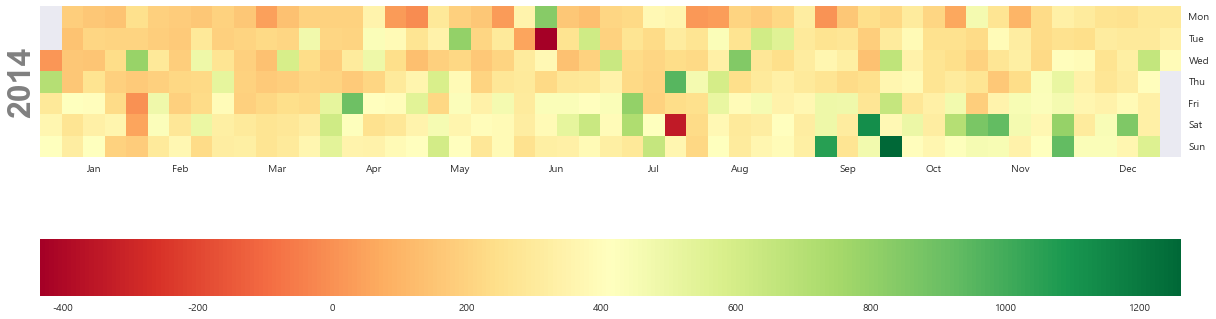

In [73]:
fig,ax=calmap.calendarplot(by_time['구매수량'],
                    fillcolor='grey', linewidth=0, cmap='RdYlGn',
                    fig_kws=dict(figsize=(17,8)))

fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist(), orientation = 'horizontal')

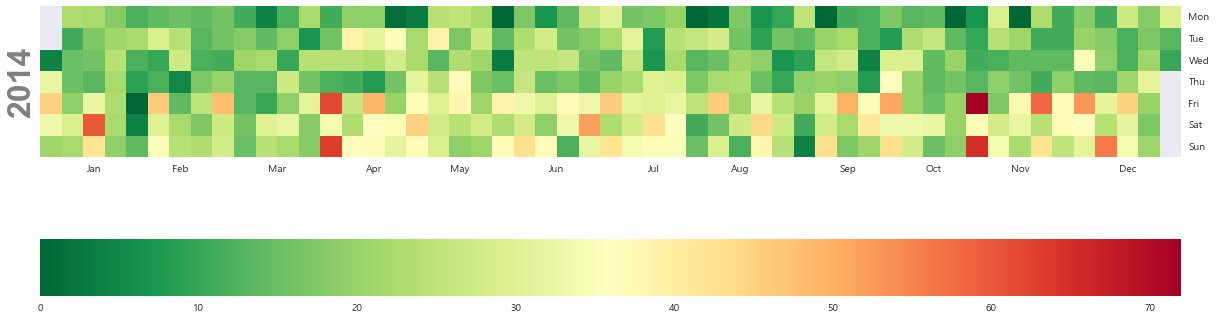

In [74]:
fig,ax=calmap.calendarplot(by_time['취소여부'],
                    fillcolor='grey', linewidth=0, cmap='RdYlGn_r',
                    fig_kws=dict(figsize=(17,8)))

fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist(), orientation = 'horizontal')

### 구매금액

In [75]:
data['구매금액'].max()

23901000

In [76]:
data['구매금액'].min()

-9555000

In [77]:
data.head()

,ID,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,구매금액,취소여부
0,410362886,의류잡화,여성용의류-정장류,서울 송파구,2014-05-10,1,1,198000,0
1,643279402,식품,농산물,경기 성남시,2014-06-12,1,1,2000,0
2,643279402,식품,농산물,경기 성남시,2014-06-12,1,1,4000,0
3,643279402,식품,농산물,경기 성남시,2014-06-12,1,1,5000,0
4,643279402,식품,농산물,경기 성남시,2014-06-12,1,1,9000,0



# Demo and Data combined analysis

In [116]:
all_data = pd.merge(demo, data, on='ID')
all_data.head()

,ID,성별,연령,거주지역,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,구매금액,취소여부
0,478207946,남,84,서울 성동구,가전제품,컴퓨터주변기기,서울 동대문구,2014-12-19,13,1,59000,0
1,478207946,남,84,서울 성동구,가전제품,TV/AV,서울 동대문구,2014-10-31,14,1,106000,0
2,478207946,남,84,서울 성동구,가전제품,주방가전,서울 중구,2014-08-15,15,1,37000,0
3,478207946,남,84,서울 성동구,의류잡화,여성용의류-이너웨어,서울 동대문구,2014-03-22,17,1,118000,0
4,479806984,남,84,서울 서초구,생활잡화,화장품,서울 중구,2014-07-04,12,1,22000,0


In [117]:
all_data.isnull().sum()

ID        0
성별        0
연령        0
거주지역      0
상품대분류명    0
상품중분류명    0
구매지역      0
구매일자      0
구매시간      0
구매수량      0
구매금액      0
취소여부      0
dtype: int64

In [118]:
all_data['월'] = pd.DatetimeIndex(all_data['구매일자']).month

In [119]:
지역 = []
for i in range(0, 101692):
    지역.append(all_data['구매지역'][i][:2])

In [120]:
all_data['지역'] = 지역

In [121]:
all_data.head()

,ID,성별,연령,거주지역,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,구매금액,취소여부,월,지역
0,478207946,남,84,서울 성동구,가전제품,컴퓨터주변기기,서울 동대문구,2014-12-19,13,1,59000,0,12,서울
1,478207946,남,84,서울 성동구,가전제품,TV/AV,서울 동대문구,2014-10-31,14,1,106000,0,10,서울
2,478207946,남,84,서울 성동구,가전제품,주방가전,서울 중구,2014-08-15,15,1,37000,0,8,서울
3,478207946,남,84,서울 성동구,의류잡화,여성용의류-이너웨어,서울 동대문구,2014-03-22,17,1,118000,0,3,서울
4,479806984,남,84,서울 서초구,생활잡화,화장품,서울 중구,2014-07-04,12,1,22000,0,7,서울


In [122]:
a = all_data['지역'].value_counts()

In [123]:
a = pd.DataFrame(a)
a.reset_index(inplace=True)

<AxesSubplot:xlabel='index', ylabel='지역'>

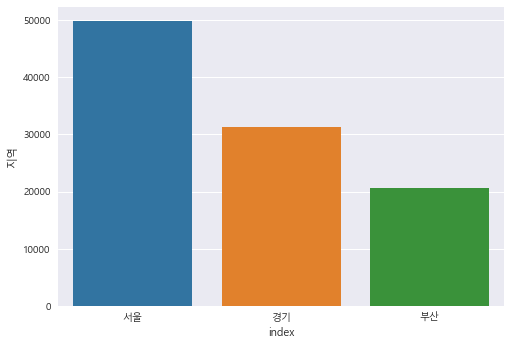

In [126]:
sns.barplot(x=a['index'], y= a['지역'])

<AxesSubplot:>

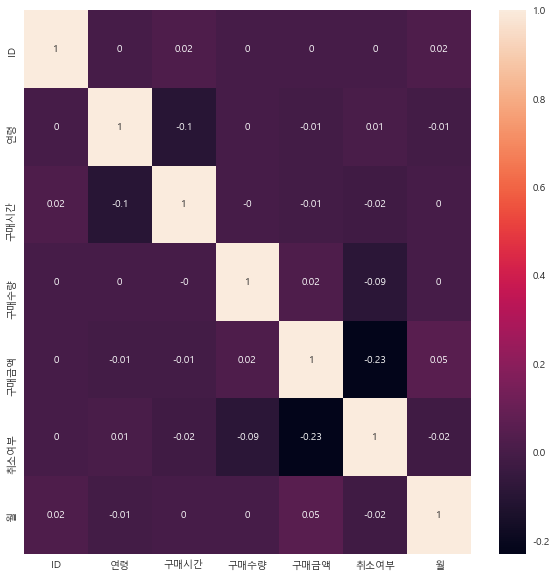

In [87]:
plt.figure(figsize= (10, 10))
sns.heatmap(np.round(all_data.corr(),2), annot= True)

### 연령/상품대분류명

In [88]:
age_product = all_data.groupby(['연령','상품대분류명'])['구매수량'].agg('sum')
age_product = pd.DataFrame(age_product)

In [89]:
age_product.reset_index(inplace=True)

C:\Users\MSI\anaconda3\envs\tf-latest\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '구매수량/연령')

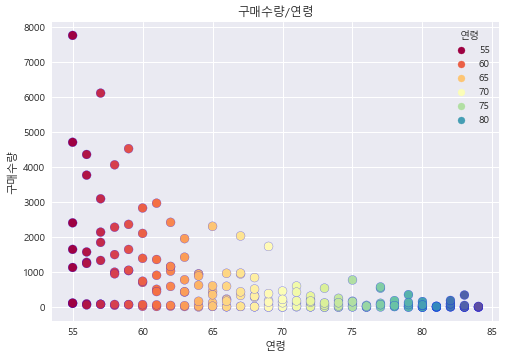

In [90]:
sns.scatterplot(age_product['연령'], age_product['구매수량'], hue= age_product['연령'], 
                palette='Spectral', s = 80, linewidth=0.2, edgecolor="b" )
plt.title('구매수량/연령')

In [91]:
apg = all_data.groupby(['연령','상품대분류명', '성별'])['구매수량'].agg('sum')
apg = pd.DataFrame(apg)
apg.reset_index(inplace=True)

In [92]:
apg_man = apg[apg['성별']=='남']
apg_women = apg[apg['성별']=='여']

C:\Users\MSI\anaconda3\envs\tf-latest\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '구매수량/연령/남자')

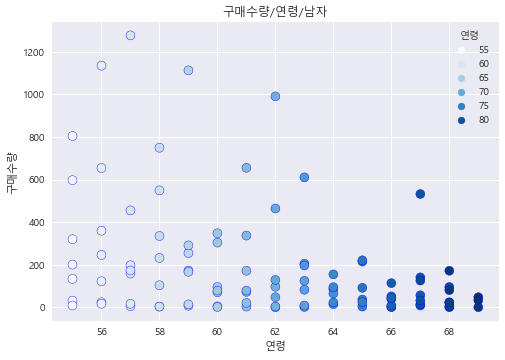

In [93]:
#by men
sns.scatterplot(apg_man['연령'], apg_man['구매수량'], hue= age_product['연령'], 
                palette='Blues', s = 80, linewidth=0.4, edgecolor="b" )
plt.title('구매수량/연령/남자')

C:\Users\MSI\anaconda3\envs\tf-latest\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '구매수량/연령/여자')

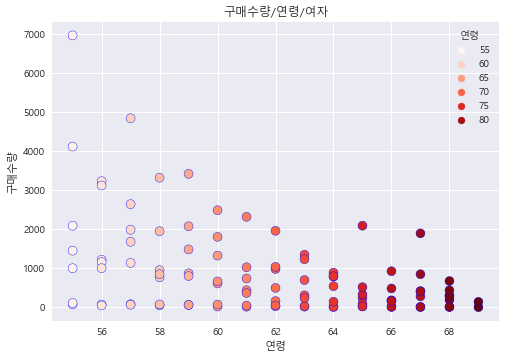

In [94]:
#by women
sns.scatterplot(apg_women['연령'], apg_women['구매수량'], hue= age_product['연령'], 
                palette='Reds', s = 80, linewidth=0.4, edgecolor="b" )
plt.title('구매수량/연령/여자') 

### 성별/ 상품대분류명/구매수량

In [95]:
gender_product = all_data.groupby(['성별','상품대분류명'])['구매수량'].agg('sum')
gender_product = pd.DataFrame(gender_product)
gender_product.reset_index(inplace=True)

In [96]:
all_data.columns

Index(['ID', '성별', '연령', '거주지역', '상품대분류명', '상품중분류명', '구매지역', '구매일자', '구매시간',
       '구매수량', '구매금액', '취소여부', '월', '지역'],
      dtype='object')

C:\Users\MSI\anaconda3\envs\tf-latest\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


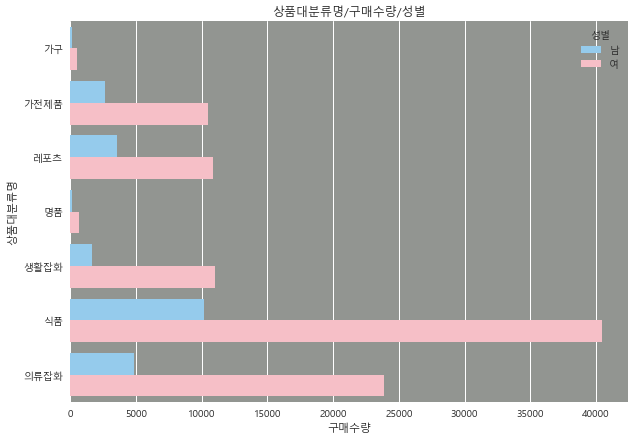

In [97]:
plt.figure(figsize=(10,7))
gp = sns.barplot(gender_product['구매수량'], gender_product['상품대분류명'],
                hue=(gender_product['성별']), palette= ['#87CEFA', '#FFB6C1'])
                     #s = 200, linewidth=0.4, edgecolor="b" )
gp.set_facecolor('gainsboro')
plt.title('상품대분류명/구매수량/성별') 
gp.set_facecolor('xkcd:grey')

### 성별/상품중분류명/구매수량

In [98]:
gender_gp = all_data.groupby(['성별','상품중분류명'])['구매수량'].agg('sum')
gender_gp = pd.DataFrame(gender_gp)
gender_gp.reset_index(inplace=True)

Text(0.5, 1.0, '여자')

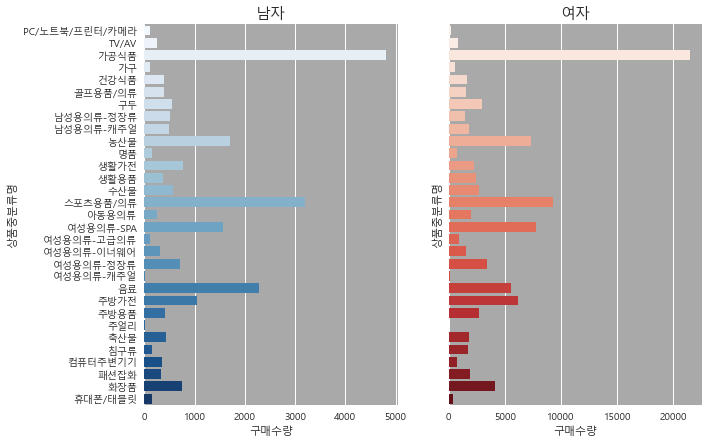

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(10,7), sharey= True)
a = sns.barplot(data=gender_gp[gender_gp['성별']=='남'], x='구매수량', y='상품중분류명', ax= axes[0], palette='Blues')
b = sns.barplot(data=gender_gp[gender_gp['성별']=='여'], x='구매수량', y='상품중분류명', ax= axes[1], palette='Reds')
a.set_facecolor('darkgrey')
b.set_facecolor('darkgrey')
a.set_title('남자', fontsize = 15)
b.set_title('여자', fontsize = 15)

### 상품대분류명 / 구매수량 / 취소여부

In [100]:
all_data.columns

Index(['ID', '성별', '연령', '거주지역', '상품대분류명', '상품중분류명', '구매지역', '구매일자', '구매시간',
       '구매수량', '구매금액', '취소여부', '월', '지역'],
      dtype='object')

<Figure size 864x504 with 0 Axes>

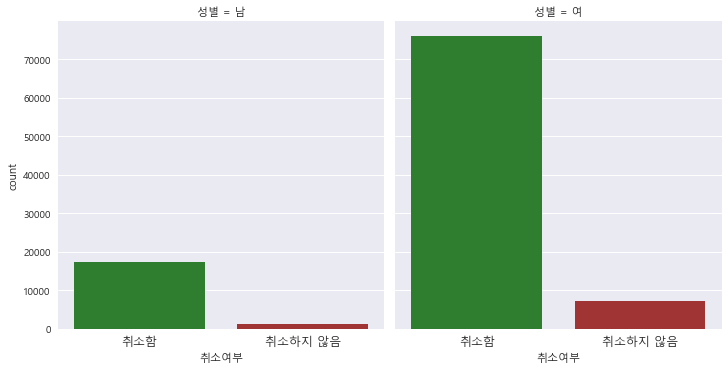

In [101]:
plt.figure(figsize=(12, 7))
cg = sns.catplot(data = all_data, x = '취소여부', kind='count', col='성별', palette=['forestgreen', 'firebrick'])
cg.set_xticklabels(['취소함','취소하지 않음'], fontsize = 12)

In [102]:
women = all_data['성별'] == '여'
only_w = all_data[women]

Text(0.5, 0.98, ' 상품대분류명 / 구매수량 / 취소여부 / 여')

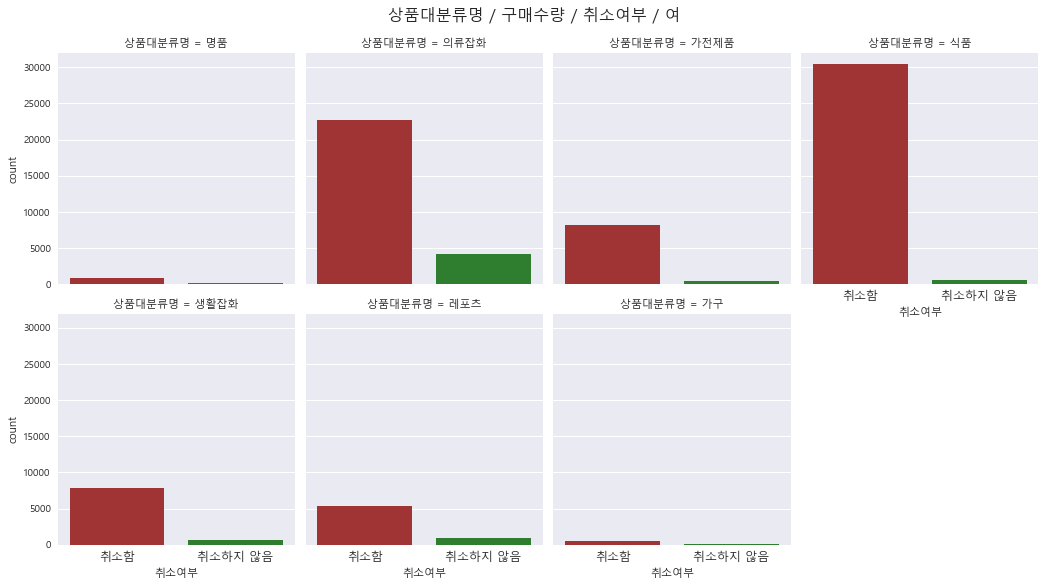

In [103]:
cgw = sns.catplot(data = only_w, x = '취소여부', kind='count', col='상품대분류명', palette=['firebrick'
                                                                                  , 'forestgreen'],
                 col_wrap=4, height=4, aspect=.9)
cgw.set_xticklabels(['취소함','취소하지 않음'], fontsize = 12)
cgw.fig.subplots_adjust(top=0.9)
cgw.fig.suptitle(' 상품대분류명 / 구매수량 / 취소여부 / 여', fontsize=16)

### 월/ 구매수량

In [105]:
by_month = all_data.groupby('월')['구매수량'].agg('sum')
by_month = pd.DataFrame(by_month)
by_month.reset_index(inplace=True)

([<matplotlib.axis.XTick at 0x1be3734ae20>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

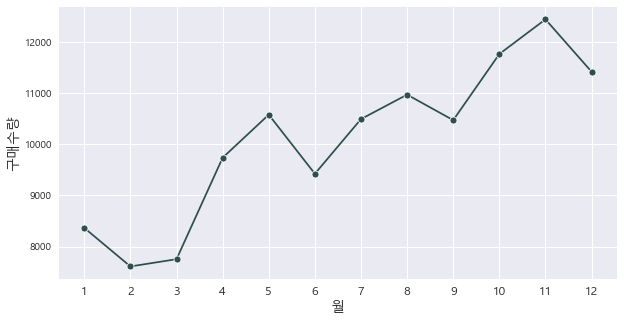

In [114]:
##this would be net amount (-negative quantities and positive quantities)
plt.figure(figsize=(10,5))
sns.lineplot(x=by_month['월'], y=by_month['구매수량'], marker='o',color='darkslategray' ) 
plt.xlabel('월', fontsize = 14)
plt.ylabel('구매수량', fontsize = 14)
plt.xticks(by_month['월'], fontsize = 12)